# Cancer Patients Data Analysis

## Introduction

## In this notebook, we will analyze a dataset of global cancer patients from 2015 to 2024.
- The dataset includes features such as age, gender, country, genetic risk, air pollution exposure, alcohol use, smoking habits, obesity level, cancer type, cancer stage, and treatment cost in USD. 
- The goal is to explore the data, visualize key trends, and potentially apply machine learning techniques to uncover insights.

 ## Importing the necessary libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
df  = pd.read_csv('global_cancer_patients_2015_2024.csv')
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


 View first 5 rows to get a sense of the dataset

# Exploring the Data

## We need to understand the dataset's size, types of features, presence of missing values or duplicates, and get basic statistics

In [36]:
df.shape

(50000, 15)

  size of the dataset (rows, columns)

## Check percentage of missing values in each column

In [37]:
df.isnull().mean()

Patient_ID               0.0
Age                      0.0
Gender                   0.0
Country_Region           0.0
Year                     0.0
Genetic_Risk             0.0
Air_Pollution            0.0
Alcohol_Use              0.0
Smoking                  0.0
Obesity_Level            0.0
Cancer_Type              0.0
Cancer_Stage             0.0
Treatment_Cost_USD       0.0
Survival_Years           0.0
Target_Severity_Score    0.0
dtype: float64

  no missing data 

# If there duplicated rows

In [38]:
df.duplicated().mean()

0.0

no duplicated data 

# Information about each column type & no

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

Summary of dataset types and null values

 ## Summary statistics for numerical columns to get a sense of the data distribution

In [40]:
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


# Show column names 

In [41]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

## From last steps , we learn
 - The structure and completeness of the data.
 - Which columns are numerical or categorical.
 - Any missing or duplicate data issues.

# Preprocessing

## Drop Unncessary cols

In [42]:
df.drop(columns=['Patient_ID', 'Cancer_Stage'], axis=1, inplace=True) 

We drop columns that are not useful for our ML task

## Count of Each Cancer Type

In [43]:
df['Cancer_Type'].value_counts()

Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Cervical    6222
Breast      6189
Lung        6159
Name: count, dtype: int64

 most common cancer types

## Cancer Type Distribution

C:\Users\Pain\AppData\Local\Temp\ipykernel_9364\1308995075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cancer_Type', data=df, palette='jet_r')


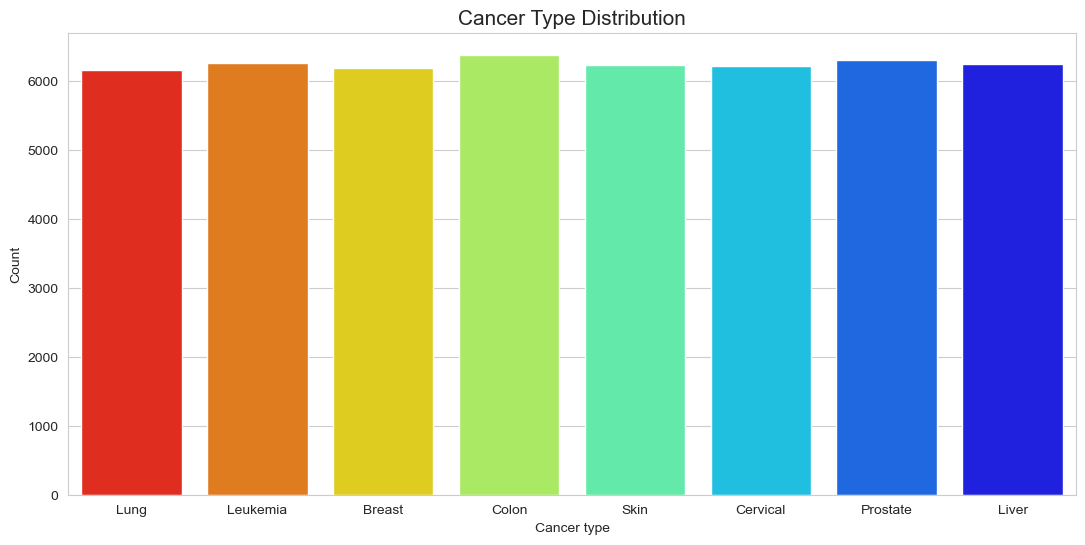

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
sns.countplot(x='Cancer_Type', data=df, palette='jet_r')
plt.title('Cancer Type Distribution', fontsize=15)
plt.xlabel('Cancer type')
plt.ylabel('Count')
plt.show()

This plot helps us understand which cancer types are more common in the dataset

# Cancer Type by Gender

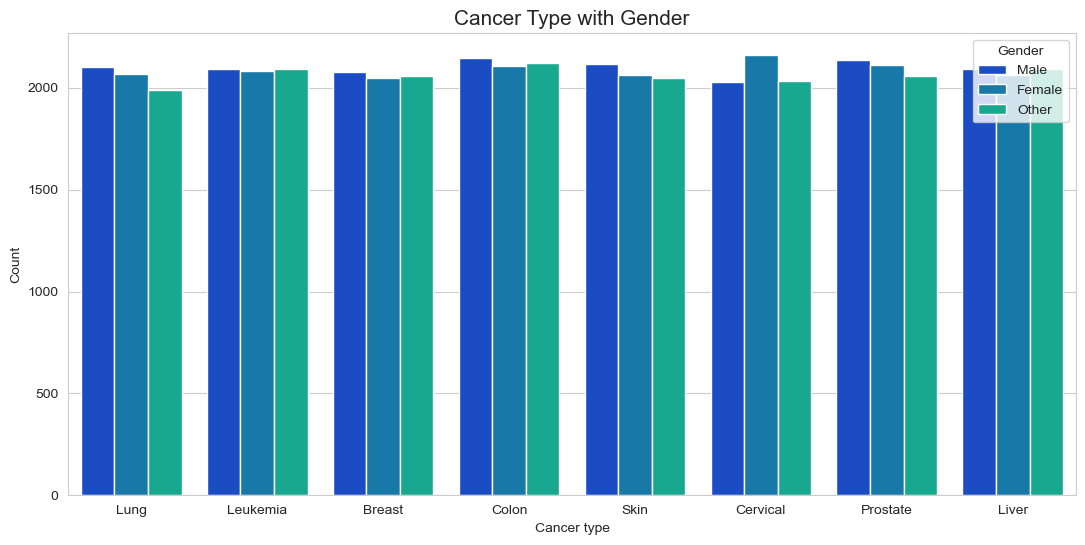

In [45]:
plt.figure(figsize=(13, 6))
sns.countplot(x=df['Cancer_Type'], hue=df['Gender'], palette='winter')
plt.title('Cancer Type with Gender', fontsize=15)
plt.xlabel('Cancer type')
plt.ylabel('Count')
plt.show()

We explore gender-based patterns in cancer type distribution

# Country/Region Distribution

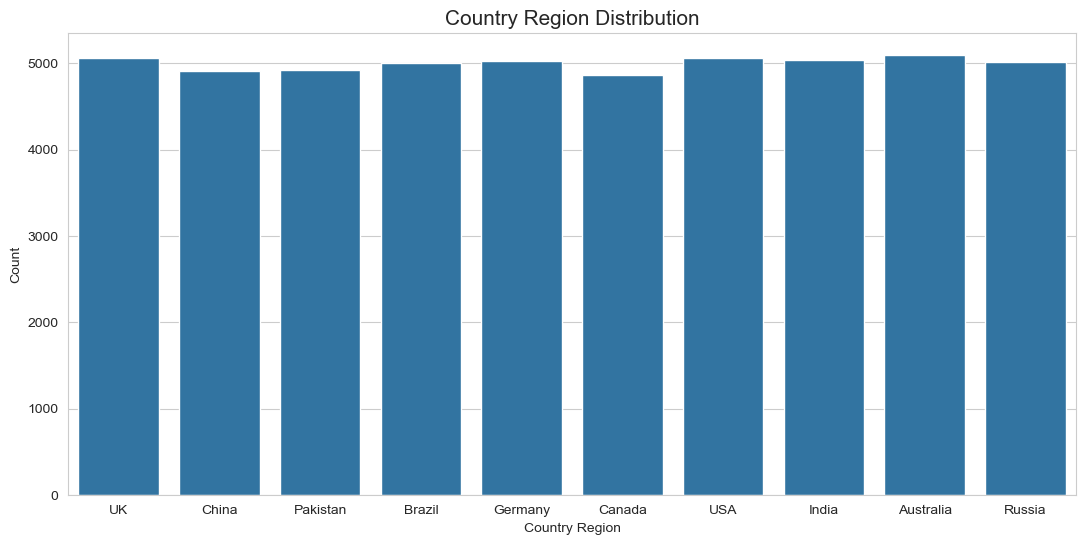

In [46]:
plt.figure(figsize=(13, 6))
sns.countplot(x=df['Country_Region'])
plt.title('Country Region Distribution', fontsize=15)
plt.xlabel('Country Region')
plt.ylabel('Count')
plt.show()

Shows which countries have more cancer patients in the data

# Survival Years Over Time

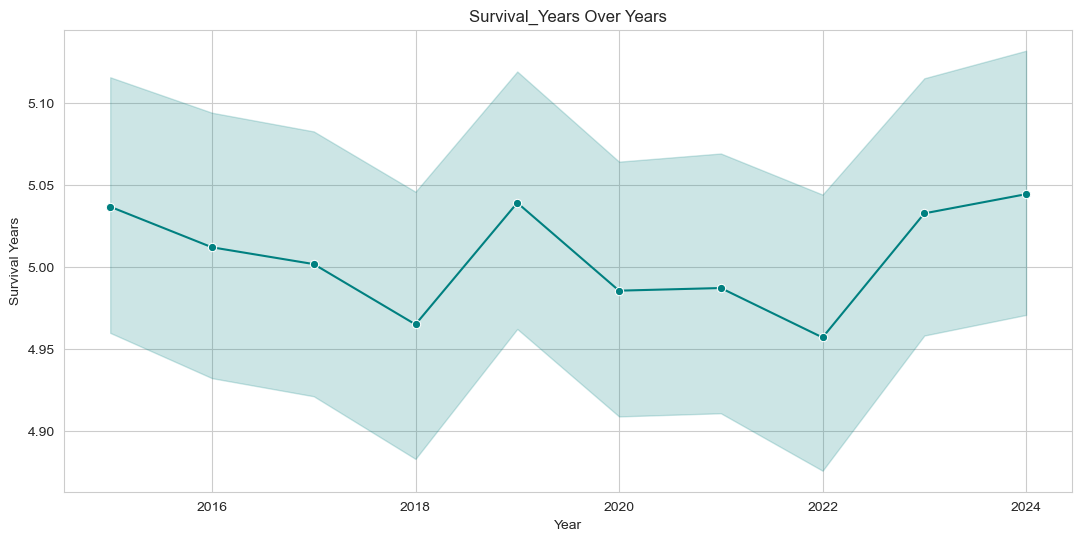

In [47]:
plt.figure(figsize=(13, 6))
sns.lineplot(x=df['Year'], y=df['Survival_Years'], marker='o', color='teal')
plt.title('Survival_Years Over Years')
plt.xlabel('Year')
plt.ylabel('Survival Years')
plt.show()

This shows how survival rates have changed over time

# Obesity Level Over Time

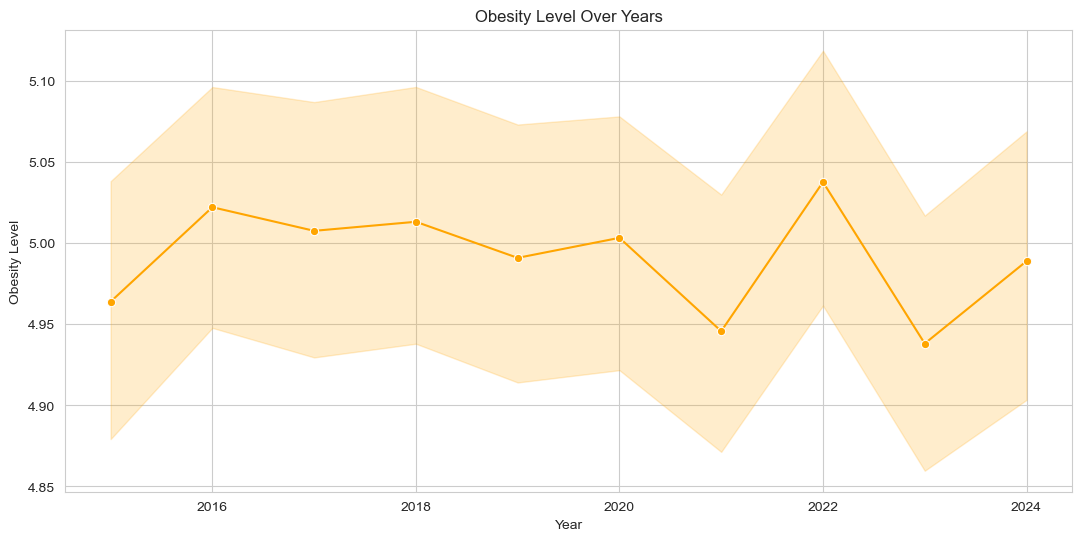

In [48]:
plt.figure(figsize=(13, 6))
sns.lineplot(x=df['Year'], y=df['Obesity_Level'], marker='o', color='orange')
plt.title('Obesity Level Over Years')
plt.xlabel('Year')
plt.ylabel('Obesity Level')
plt.show()

Analyzing trend in obesity among patients which could relate to cancer risk

# Histograms of All Features

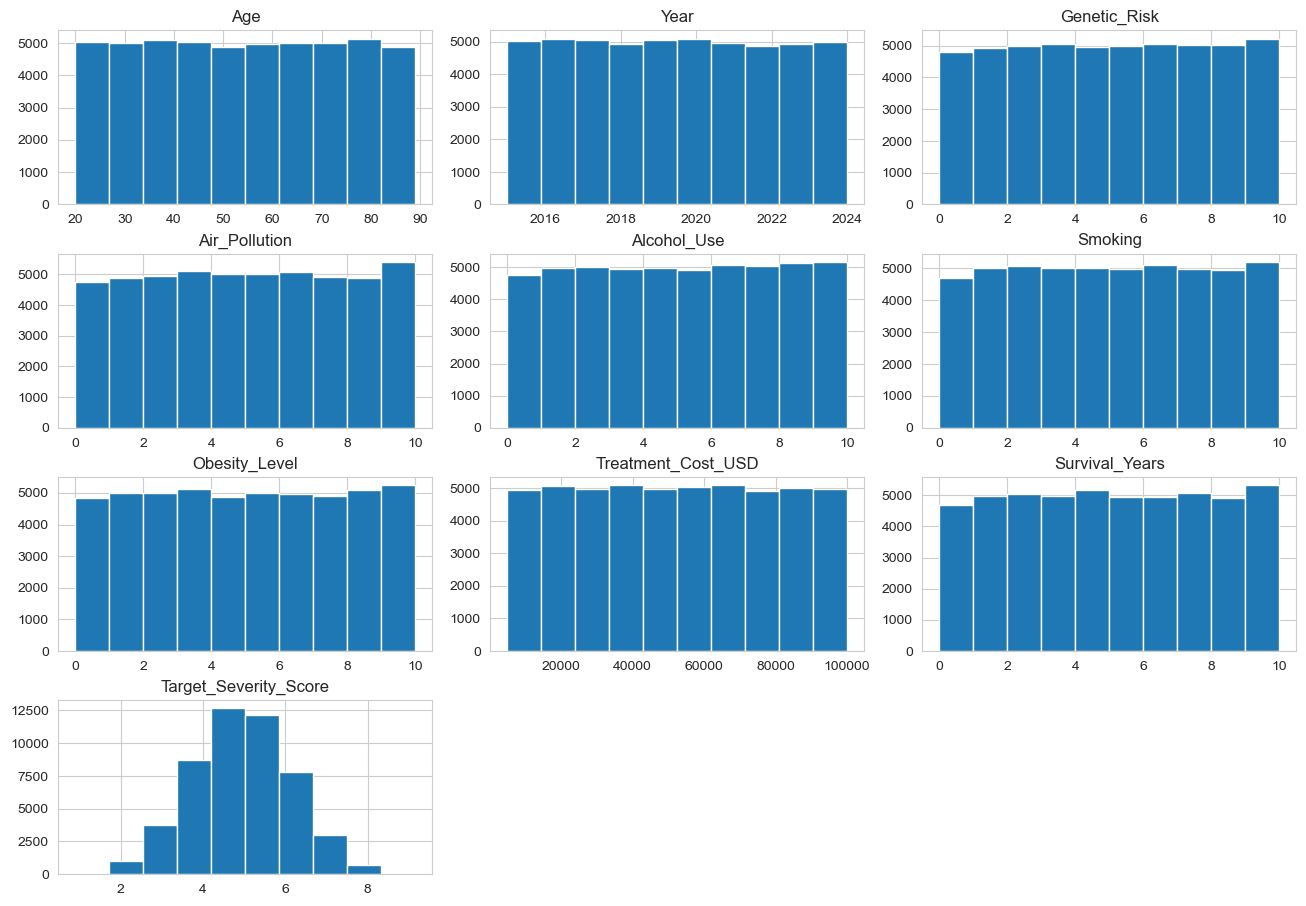

In [49]:
df.hist(figsize=(13,9))
plt.tight_layout(pad=0.5)
plt.show()

Gives distribution of numeric features

# Correlation Heatmap

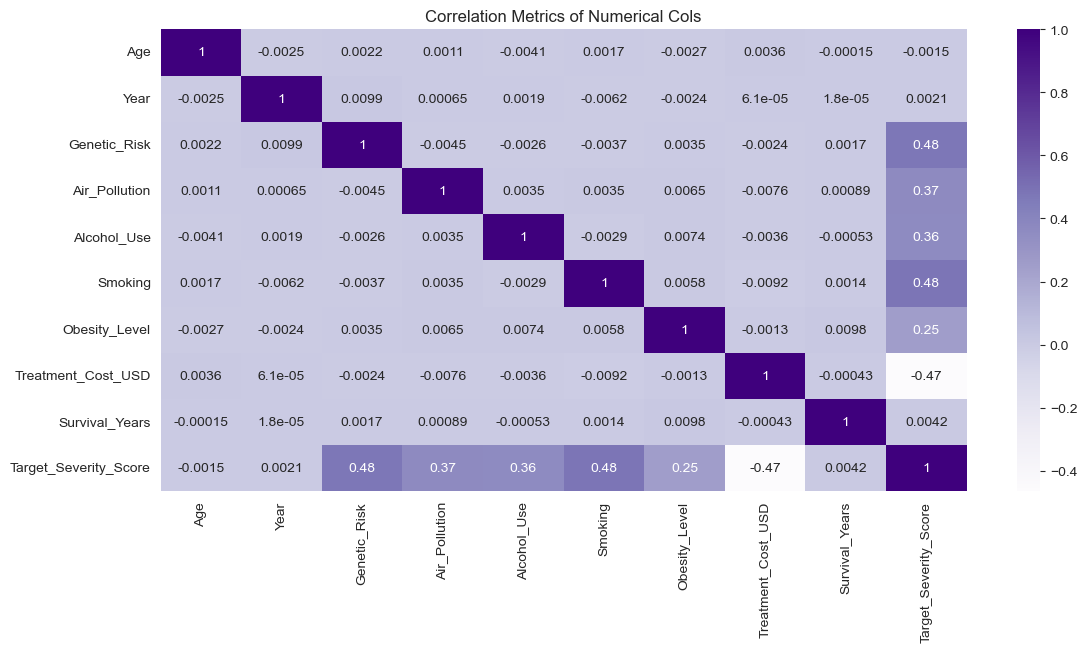

In [50]:
plt.figure(figsize=(13, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Purples')
plt.title('Correlation Metrics of Numerical Cols')
plt.show()

Helps identify relationships between features

## Drop Country_Region before ML

In [51]:
df.drop('Country_Region', axis=1, inplace=True)

It is a categorical location column, may not help directly in prediction

## Preprocessing for ML

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

## Encode categorical variables

In [53]:
le = LabelEncoder()
for col in ['Gender', 'Cancer_Type']:
    df[col] = le.fit_transform(df[col])

Separate features and target

In [54]:
X = df.drop('Cancer_Type', axis=1)
y = df['Cancer_Type']

## Split dataset

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train ML Models

In [57]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

In [58]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='macro')
    print(f"\nName: {name}")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision Score: {prec:.2f}")
    print("Classification Report:\n", classification_report(y_test, preds))



Name: Random Forest
Accuracy: 0.12
Precision Score: 0.12
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.11      0.11      1262
           1       0.11      0.12      0.12      1231
           2       0.13      0.15      0.14      1283
           3       0.12      0.13      0.12      1233
           4       0.12      0.12      0.12      1259
           5       0.12      0.10      0.11      1230
           6       0.13      0.11      0.12      1269
           7       0.12      0.10      0.11      1233

    accuracy                           0.12     10000
   macro avg       0.12      0.12      0.12     10000
weighted avg       0.12      0.12      0.12     10000


Name: Gradient Boosting
Accuracy: 0.13
Precision Score: 0.13
Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.09      0.10      1262
           1       0.15      0.14      0.14      1231
           2      

## Confusion Matrix for each model

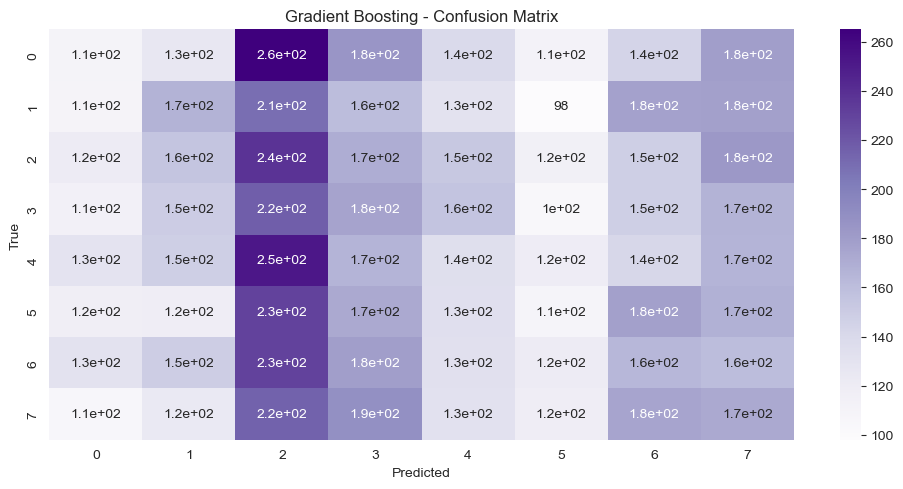

In [59]:
plt.figure(figsize=(10, 5))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, cmap='Purples')
plt.title(f"{name} - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

### Predicting Survival Years Using Linear Regression

we’ve explored the data and relationships between variables, we move on to applying a Machine Learning model.  
We’ll use **Linear Regression** to predict the number of `Survival_Years` based on multiple risk factors.  

This model will help us understand to what extent these risk factors influence patient survival.  
We’ll use a **Pipeline** to streamline preprocessing (scaling) and model training.

In [60]:
features = ["Genetic_Risk", "Air_Pollution", "Smoking", "Alcohol_Use", "Obesity_Level"]

X = df[features]
y = df["Survival_Years"]

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 8.32
Mean Absolute Error (MAE): 2.50
R² Score: -0.00


- **Linear Regression** gave us a way to predict how long a patient might survive based on their risk factors.
- The model’s accuracy is assessed using:
  - **MSE (Mean Squared Error)**: How far predictions are from actual values on average (squared).
  - **MAE (Mean Absolute Error)**: The average magnitude of errors.
  - **R² Score**: How well the model explains the variation in the target variable. Closer to 1 = better.

We can now consider this a baseline model and compare it with other algorithms later.
